In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D 
from matplotlib.patches import Patch
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# Read the CSV
df = pd.read_csv('offline_rl_metrics.csv')

# Parse values (mean ± std format)
methods = df.columns[1:].tolist()
metrics = df['Metric'].tolist()

# Extract means and stds
data = {}
for metric in metrics:
    row = df[df['Metric'] == metric].iloc[0]
    means = []
    stds = []
    for method in methods:
        val = row[method]
        parts = val.split(' ± ')
        means.append(float(parts[0]))
        stds.append(float(parts[1]))
    data[metric] = {'means': means, 'stds': stds}

print(f"Metrics: {metrics}")
print(f"Methods: {methods}")

Metrics: ['Reward', 'Weaning Score', 'Action Change Penalty']
Methods: ['SPOT', 'MOBILE', 'MBPO', 'GORMPO-KDE', 'GORMPO-VAE', 'GORMPO-RealNVP', 'GORMPO-DDPM', 'GORMPO-NeuralODE']


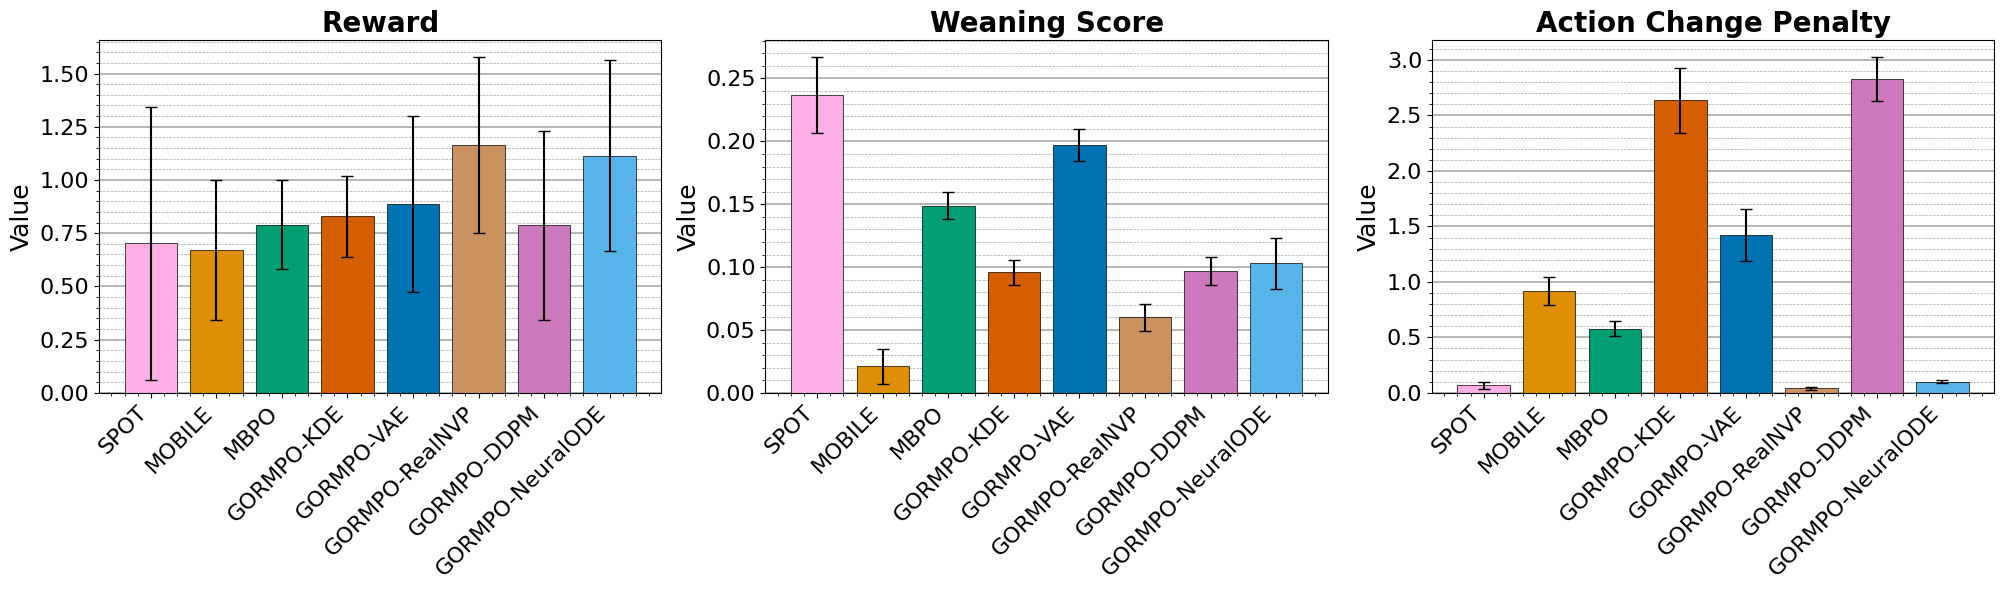

In [9]:
# Create 3 bar plots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

palette = sns.color_palette('colorblind')
colors = [palette[i] for i in [6, 1, 2, 3, 0, 5, 4, 9]]
x = np.arange(len(methods))

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    means = data[metric]['means']
    stds = data[metric]['stds']
    
    bars = ax.bar(x, means, yerr=stds, capsize=4, color=colors, edgecolor='black', linewidth=0.5)
    
    ax.set_ylabel('Value', fontsize=18)
    ax.set_title(f'{metric}', fontsize=20, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(methods, rotation=45, ha='right', fontsize=16)
    ax.tick_params(axis='both', labelsize=16)
    
    # Enable minor ticks and set up grid
    ax.minorticks_on()
    # Put grid lines behind the bars
    ax.set_axisbelow(True)
    
    ax.grid(axis='y', which='major', alpha=1.0, linewidth=1.2, color='darkgray')
    ax.grid(axis='y', which='minor', alpha=0.7, linewidth=0.5, color='gray', linestyle='--')

plt.tight_layout()
plt.savefig('offline_rl_metrics_barplots.png', dpi=150, bbox_inches='tight')
plt.show()

/tmp/ipykernel_1326104/610347853.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


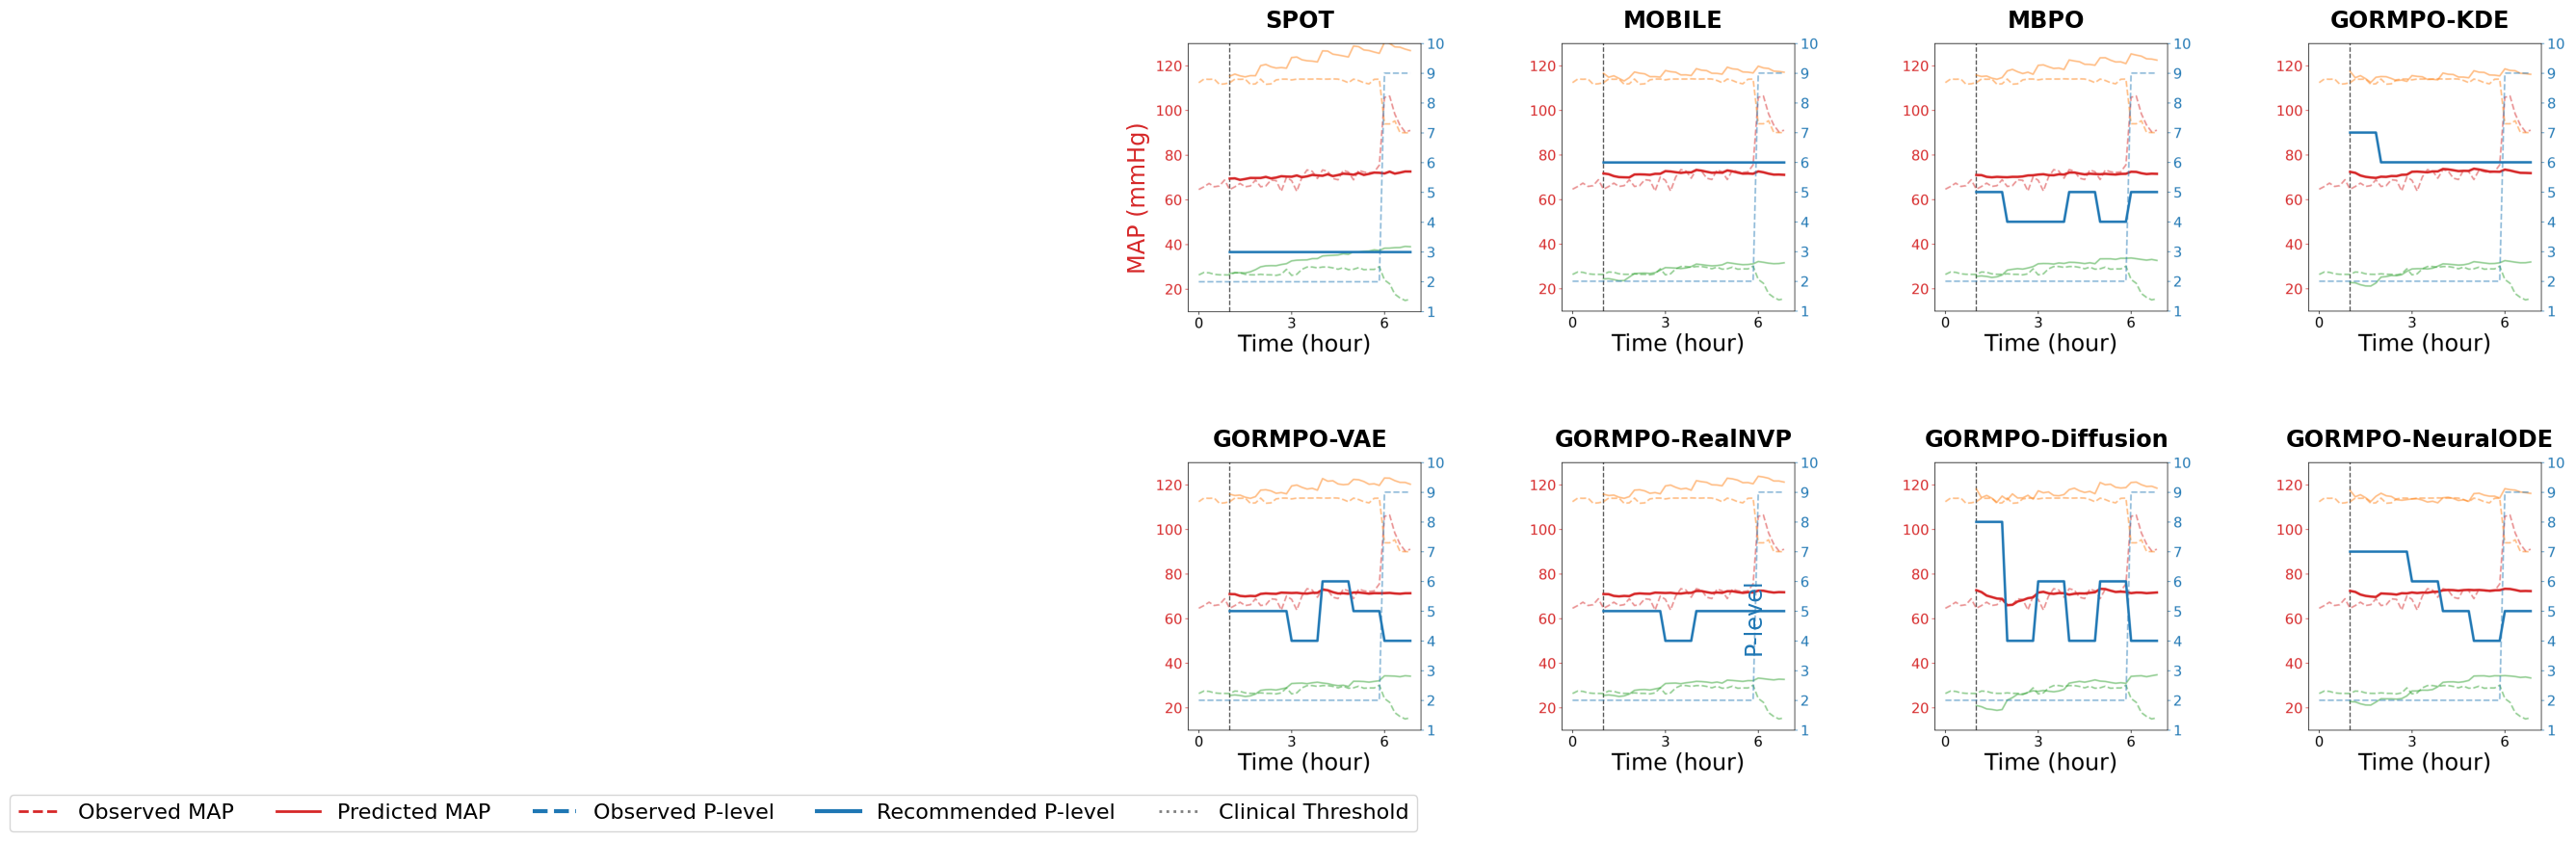

In [65]:
# fig1 = plt.imread("eval_sample_bc.png")
fig1 = plt.imread("paper_figures/eval_sample_spot.png")

fig2 = plt.imread("paper_figures/eval_sample_mobile.png")
fig3 = plt.imread("paper_figures/eval_sample_mbpo.png")
fig4 = plt.imread("paper_figures/eval_sample_kde.png")
fig5 = plt.imread("paper_figures/eval_sample_vae.png")
fig6 = plt.imread("paper_figures/eval_sample_realnvp.png")
fig7 = plt.imread("paper_figures/eval_sample_diffusion.png")
fig8 = plt.imread("paper_figures/eval_sample_neuralode.png")


fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 4, figure=fig, wspace=-0.0, hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])
#ax6 = fig.add_subplot(gs[2, 1])
#fig.suptitle('Evaluation Samples', fontsize=16)
ax1.imshow(fig1)
ax1.set_title('SPOT', fontweight="bold", size='xx-large')
ax1.text(-0.05, 0.5, 'MAP (mmHg)', va='center', ha='center', rotation='vertical',
         size="xx-large", color='tab:red', transform=ax1.transAxes)
ax1.axis('off')
ax2.imshow(fig2)
ax2.set_title('MOBILE', fontweight="bold", size='xx-large')
ax2.axis('off')
ax3.imshow(fig3)
ax3.set_title('MBPO', fontweight="bold", size='xx-large')
ax3.axis('off')
ax4.imshow(fig4)
ax4.set_title('GORMPO-KDE',fontweight="bold", size='xx-large')
ax4.axis('off')
ax5.imshow(fig5)
ax5.set_title('GORMPO-VAE', fontweight="bold",size='xx-large')
ax5.axis('off')
ax6.imshow(fig6)
ax6.set_title('GORMPO-RealNVP', fontweight="bold",size='xx-large')
ax6.axis('off')

ax7.imshow(fig7)
ax7.set_title('GORMPO-Diffusion', fontweight="bold",size='xx-large')
ax7.axis('off')

ax8.imshow(fig8)
ax8.set_title('GORMPO-NeuralODE', fontweight="bold",size='xx-large')
ax8.axis('off')

#put legend

ax6.text(2.05, -0.5, 'P-level', va='center', ha='center', rotation='vertical',
         size="xx-large", color='tab:blue', transform=ax5.transAxes)
legend_elements = [
    Line2D([0], [0], color='tab:red', linestyle='--', lw=2, label='Observed MAP'),
    Line2D([0], [0], color='tab:red', linestyle='-', lw=2, label='Predicted MAP'),
            Line2D([0], [0], color='tab:blue', linestyle='--', lw=3, label='Observed P-level'),

    Line2D([0], [0], color='tab:blue', linestyle='-', lw=3, label='Recommended P-level'),
#     Line2D([0], [0], color='tab:orange', linestyle='--', lw=2, label='Observed HR'),
#     Line2D([0], [0], color='tab:orange', linestyle='-', lw=2, label='Predicted HR'),    
#   Line2D([0], [0], color='tab:green', linestyle='--', lw=2, label='Observed PULSAT'),
#     Line2D([0], [0], color='tab:green', linestyle='-', lw=2, label='Predicted PULSAT'),  
        Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Clinical Threshold'),  


]
# #print the labels
ax5.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(-1.5, -0.2), ncol=5,  fontsize=16)

plt.tight_layout()
# plt.savefig('eval_samples_all.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_1331827/2539455593.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


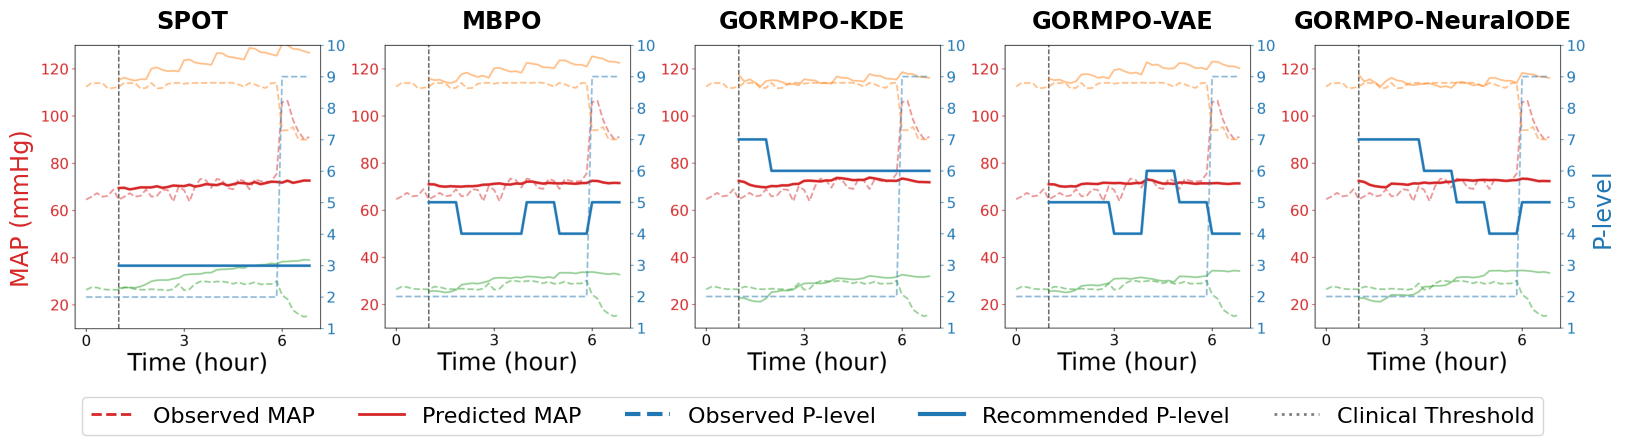

In [4]:
# fig1 = plt.imread("eval_sample_bc.png")
fig1 = plt.imread("paper_figures/eval_sample_spot.png")

fig2 = plt.imread("paper_figures/eval_sample_mobile.png")
fig3 = plt.imread("paper_figures/eval_sample_mbpo.png")
fig4 = plt.imread("paper_figures/eval_sample_kde.png")
fig5 = plt.imread("paper_figures/eval_sample_vae.png")
fig6 = plt.imread("paper_figures/eval_sample_realnvp.png")
fig7 = plt.imread("paper_figures/eval_sample_diffusion.png")
fig8 = plt.imread("paper_figures/eval_sample_neuralode.png")


fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 5, figure=fig, wspace=-0.0, hspace=-0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])
#ax6 = fig.add_subplot(gs[2, 1])
#fig.suptitle('Evaluation Samples', fontsize=16)
ax1.imshow(fig1)
ax1.set_title('SPOT', fontweight="bold", size='xx-large')
ax1.text(-0.05, 0.5, 'MAP (mmHg)', va='center', ha='center', rotation='vertical',
         size="xx-large", color='tab:red', transform=ax1.transAxes)
ax1.axis('off')
ax2.imshow(fig3)
ax2.set_title('MBPO', fontweight="bold", size='xx-large')
ax2.axis('off')
ax3.imshow(fig4)
ax3.set_title('GORMPO-KDE',fontweight="bold", size='xx-large')
ax3.axis('off')
ax4.imshow(fig5)
ax4.set_title('GORMPO-VAE', fontweight="bold",size='xx-large')
ax4.axis('off')
ax5.imshow(fig8)
ax5.set_title('GORMPO-NeuralODE', fontweight="bold",size='xx-large')
ax5.axis('off')

#put legend

ax5.text(1.05, 0.5, 'P-level', va='center', ha='center', rotation='vertical',
         size="xx-large", color='tab:blue', transform=ax5.transAxes)
legend_elements = [
    Line2D([0], [0], color='tab:red', linestyle='--', lw=2, label='Observed MAP'),
    Line2D([0], [0], color='tab:red', linestyle='-', lw=2, label='Predicted MAP'),
            Line2D([0], [0], color='tab:blue', linestyle='--', lw=3, label='Observed P-level'),

    Line2D([0], [0], color='tab:blue', linestyle='-', lw=3, label='Recommended P-level'),
#     Line2D([0], [0], color='tab:orange', linestyle='--', lw=2, label='Observed HR'),
#     Line2D([0], [0], color='tab:orange', linestyle='-', lw=2, label='Predicted HR'),    
#   Line2D([0], [0], color='tab:green', linestyle='--', lw=2, label='Observed PULSAT'),
#     Line2D([0], [0], color='tab:green', linestyle='-', lw=2, label='Predicted PULSAT'),  
        Line2D([0], [0], color='gray', linestyle=':', lw=2, label='Clinical Threshold'),  


]
# #print the labels
ax5.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(-1.5, -0.2), ncol=5,  fontsize=16)

plt.tight_layout()
# plt.savefig('eval_samples_all.png', bbox_inches='tight', dpi=300)